# Linear regression with multiple variables

### Based on this [Course](https://www.coursera.org/learn/machine-learning)

## Feature Normalization

\begin{equation*}
x_i := \frac{x_i - \mu_i}{S_i}
\end{equation*}

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from featureNormalize import featureNormalize
from gradientDescent import gradientDescent
from normalEqn import normalEqn

print('Loading data ...')
data = np.loadtxt('ex1data2.txt', delimiter=",")
X = data[:, :2]
y = data[:, 2]
m = len(y);

print('First 10 examples from the dataset: ')
for i in range(10):
    print("x = [{:.0f} {:.0f}], y = {:.0f}".format(X[i, 0], X[i, 1], y[1]))

Loading data ...
First 10 examples from the dataset: 
x = [2104 3], y = 329900
x = [1600 3], y = 329900
x = [2400 3], y = 329900
x = [1416 2], y = 329900
x = [3000 4], y = 329900
x = [1985 4], y = 329900
x = [1534 3], y = 329900
x = [1427 3], y = 329900
x = [1380 3], y = 329900
x = [1494 3], y = 329900


#### Scale features and set them to zero mean

In [76]:
print('Normalizing Features ...')
X, mu, sigma = featureNormalize(X)

Normalizing Features ...


In [77]:
# Add intercept term to X
X = np.c_[np.ones((m, 1)), X]

## Gradient Descent

In [78]:
print('Running gradient descent ...');

# Choose some alpha value
alpha = 0.01
num_iters = 300

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1));
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters);

Running gradient descent ...


### Plot the convergence graph

Text(0,0.5,'Cost J')

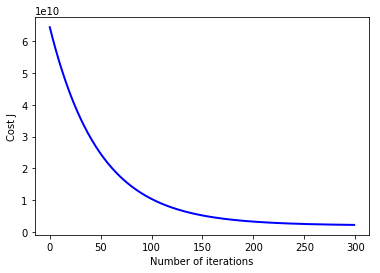

In [79]:
plt.plot(range(J_history.size), J_history, "-b", linewidth=2 )
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [80]:
# Display gradient descent's result
print('Theta computed from gradient descent: ')
print("{:f}, {:f}, {:f}".format(theta[0,0], theta[1,0], theta[2,0]))

Theta computed from gradient descent: 
323718.518396, 93537.029129, 8412.362766


## Estimate the price of a 1650 sq-ft, 3 br house

In [81]:
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
area_norm = (1650 - float(mu[:,0])) / float(sigma[:,0])
br_norm = (3 - float(mu[:,1]))/float(sigma[:,1])
house = np.array([1, area_norm, br_norm])

price = np.array(house).dot(theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:,.2f}".format(price[0]))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $280,094.92


# Normal Equation

\begin{equation*}
\theta = (X^T X)^{-1}X^T y
\end{equation*}

In [82]:
X = np.c_[np.ones((m, 1)), data[:,:2]]
y = data[:,2]
theta = normalEqn(X, y)
print('Theta computed from the normal equations:')
print("{:f}, {:f}, {:f}".format(theta[0], theta[1], theta[2]))

Theta computed from the normal equations:
340412.659574, 109447.796470, -6578.354854


## Estimate the price of a 1650 sq-ft, 3 br house

In [83]:
house = np.array([1, 1650, 3])
price = np.array(house).dot(theta)

print("Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n ${:,.2f}".format(price))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $180,909,541.77
